Image augmentation
===

How we present the images and various randomly transformed versions to the network in training mode in order to increase the dataset and improve performance.

## A random rock revisited

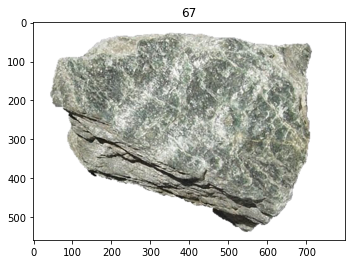

In [2281]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from glob import glob
from torchvision import transforms

rock_images_glob = "120 Rock Images/*.png"
rock_images = glob(rock_images_glob)
rock_images.sort() # get them in the right order
input_size = 224

np.random.seed(8)

rock_id = np.random.choice(len(rock_images)) # 33
img = Image.open(rock_images[rock_id])
plt.imshow(img)
plt.title(rock_id);

### Complete transformation

**Keras model Sanders & Nosofky:**  

    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=True

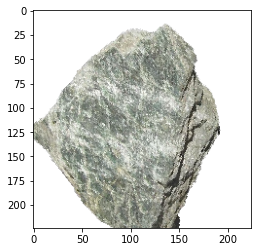

In [2932]:
from torchvision.transforms import InterpolationMode

# this happens to each image in training mode
complete_transform = transforms.Compose([
        #transforms.Resize(input_size),
        #transforms.CenterCrop(input_size),
        transforms.RandomResizedCrop(input_size, scale=(.7, 1.5), ratio=(.66, 5), interpolation=InterpolationMode.NEAREST),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomAffine(degrees=360, translate=(.2, .2), fill=0, shear=(-9, 9, -9, 9)),#, scale=(0.8, 1.4)),
        transforms.ColorJitter(brightness=(.9, 1.10), contrast=(.85, 1.15), saturation=(0.95, 1.15)), # new
        transforms.GaussianBlur(kernel_size=(1, 5), sigma=(.01, .5)), 
    ])

plt.imshow(complete_transform(img))

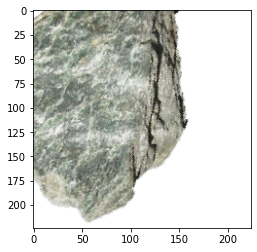

In [2313]:
# this happens to each image in training mode
complete_transform = transforms.Compose([
        transforms.RandomResizedCrop(input_size, scale=(1, 1), ratio=(.33, 2.5)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomAffine(degrees=360, translate=(0.2, 0.2), shear=(-16, 16, -16, 16), scale=(0.8, 1.4)),
        transforms.ColorJitter(brightness=(.95, 1.05), contrast=(.9, 1.1), saturation=(0.95, 1.15)), # new
        transforms.GaussianBlur(kernel_size=(1, 5), sigma=(.01, .5)), 
    ])

plt.imshow(complete_transform(img))

### Random resize crop

* Crops helpful at all? Our images are generally complete and we lose information (e.g. Shape)

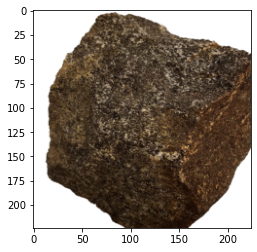

In [1254]:
random_resize_crop = transforms.RandomResizedCrop(input_size, scale=(.75, 1), ratio=(.33, 2.5))

plt.imshow(random_resize_crop(img))

### RandomAffine: Shear

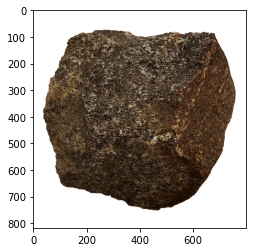

In [1104]:
shear = transforms.RandomAffine(degrees=0, shear=(-16, 16, -16, 16))
plt.imshow(shear(img))

### RandomAffine: Translate

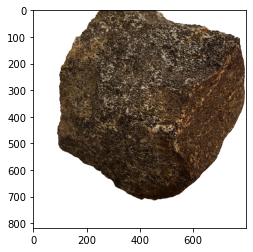

In [1142]:
shear = transforms.RandomAffine(degrees=0, translate=(0.2, 0.2))
plt.imshow(shear(img))

### RandomAffine: Scale

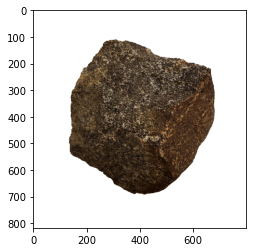

In [1215]:
shear = transforms.RandomAffine(degrees=0, scale=(0.75, 1.2))
plt.imshow(shear(img))

### Other

#### Color

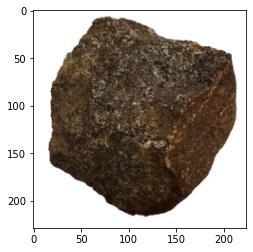

In [1529]:
color = transforms.Compose([transforms.Resize(input_size),
transforms.ColorJitter(brightness=(.95, 1.05), contrast=(.9, 1.1), saturation=(0.95, 1.15))])

plt.imshow(color(img))

#### Gaussian Blur

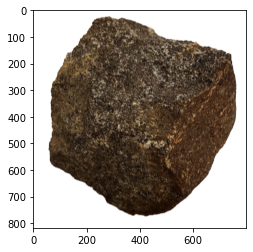

In [1664]:
gaussian = transforms.GaussianBlur(kernel_size=(1, 5), sigma=(1, 8.0))
plt.imshow(gaussian(img))

### Transforms for validation and prediction

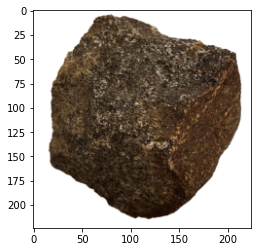

In [1530]:
val_transform = transforms.Compose([transforms.Resize(input_size),
transforms.CenterCrop(input_size)])

plt.imshow(val_transform(img))